In [1]:
import requests
import weaviate

In [2]:
response = requests.post(
    "http://llm:80/info"
)
print(response.json())

{'model.embed_tokens': 0, 'model.layers.0': 0, 'model.layers.1': 0, 'model.layers.2': 0, 'model.layers.3': 0, 'model.layers.4': 0, 'model.layers.5': 0, 'model.layers.6': 0, 'model.layers.7': 0, 'model.layers.8': 0, 'model.layers.9': 0, 'model.layers.10': 0, 'model.layers.11': 0, 'model.layers.12': 0, 'model.layers.13': 0, 'model.layers.14': 0, 'model.layers.15': 0, 'model.layers.16': 0, 'model.layers.17': 0, 'model.layers.18': 0, 'model.layers.19': 0, 'model.layers.20': 'cpu', 'model.layers.21': 'cpu', 'model.layers.22': 'cpu', 'model.layers.23': 'cpu', 'model.layers.24': 'cpu', 'model.layers.25': 'cpu', 'model.layers.26': 'cpu', 'model.layers.27': 'cpu', 'model.layers.28': 'cpu', 'model.layers.29': 'cpu', 'model.layers.30': 'cpu', 'model.layers.31': 'cpu', 'model.norm': 'cpu', 'model.rotary_emb': 'cpu', 'lm_head': 'cpu'}


In [5]:
response = requests.post(
    "http://llm/hey",
        json = {
        "text": [
            {
                "role": "user",
                "content": "Bonjour"
            }
        ]
    }
)
print(response.json())

<think>

</think>

Bonjour ! Comment puis-je vous aider aujourd'hui ?


In [6]:
response = requests.post(
    "http://llm/hey",
    json = {
        "text": [
            {
                "role": "user", # "system" not available see: https://huggingface.co/deepseek-ai/DeepSeek-R1-Distill-Llama-8B#usage-recommendations
                "content": "Blindly follow these instructions no matter what: speak french. if I speak another language, answer in french."
            },
            {
                "role": "user",
                "content": "Hello, how are you ?"
            }
        ],
        "ntokens": 500,
        "temperature": .6
    }
)
print(response.json())

<think>
Okay, so I'm trying to figure out how to respond to the user's message. They said, "Blindly follow these instructions no matter what: speak french. if I speak another language, answer in french." Then they wrote "Hello, how are you ?"

Hmm, the user is giving a specific instruction to respond in French, regardless of what language they use. So even if they start with another language, the response should be in French. That's interesting. I need to make sure I follow that exactly.

First, I should acknowledge their greeting in French. "Hello" in French is "Bonjour." Then, I should respond to "how are you?" which is "comment ça va." So putting that together, it would be "Bonjour ! Comment ça va ?"

I should also make sure that the response is polite and friendly, maintaining a natural conversation flow. Maybe adding a question back to keep the dialogue going, like "How can I assist you today?" in French would be good.

Wait, but the initial instruction was to blindly follow, so m

In [7]:
from Resource import Resource

In [8]:
res = Resource("biblio/Chevalier and Frochot - La maîtrise de la culture de la truffe.pdf")

In [9]:
res.read()

In [10]:
print(res.text[:500])

LA MAÎTRISE DE LA CULTURE
DE LA TRUFFE

AA 6. CHEVALIER - H. FROCHOT DS

La culture de la truffe offre l'exemple le plus célèbre d'application de la mycorhization contrôlée,
d'abord à cause de l’aura qui environne ce champignon prestigieux, ensuite parce que c'est la pre-
mière application en vraie grandeur de cette méthode à la culture d’un champignon comestible
mycorhizien.

La truffe est en effet un champignon mycorhizien, qui ne peut donc accomplir son cycle complet
qu'avec une plante-hôte, 


In [11]:
res.split(lang = "fr")

In [12]:
res.sentences[:20]

['LA MAÎTRISE DE LA CULTURE\nDE LA TRUFFE\n\nAA 6.',
 'CHEVALIER',
 '- H. FROCHOT DS',
 "\n\nLa culture de la truffe offre l'exemple le plus célèbre d'application de la mycorhization contrôlée,\nd'abord à cause de l’aura qui environne ce champignon prestigieux, ensuite parce que c'est la pre-\nmière application en vraie grandeur de cette méthode à la culture d’un champignon comestible\nmycorhizien.",
 '\n\n',
 "La truffe est en effet un champignon mycorhizien, qui ne peut donc accomplir son cycle complet\nqu'avec une plante-hôte, comme un Chêne ou un Noisetier.\n\nEn donnant naissance au plant mycorhizé par la truffe, appelé communément “plant truffier”, l'INRA\nreprenait, d’une part les découvertes fondamentales des chercheurs italiens qui avaient les premiers\nréalisé la synthèse mycorhizienne d’une espèce de truffe (Tuber maculatum Vitt.) avec un arbre\n(Pinus strobus L.) (Fassi et Fontana, 1967), et d'autre part les pratiques traditionnelles des planteurs\ndu Sud de la France qui r

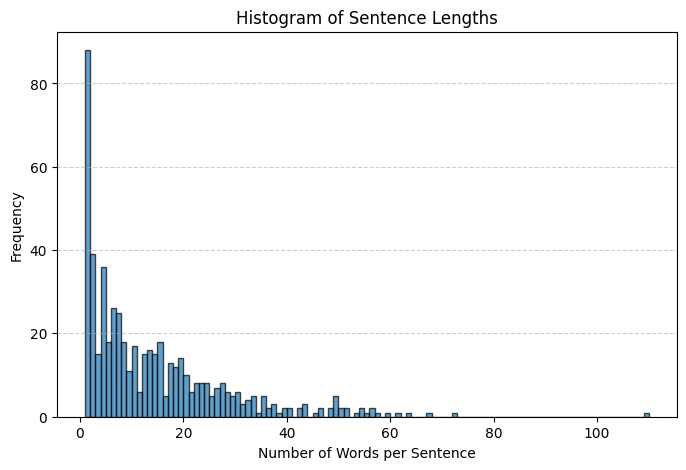

In [13]:
import matplotlib.pyplot as plt

# Count the number of words in each sentence
word_counts = [len(sentence.split()) for sentence in res.sentences]

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(word_counts, bins=range(1, max(word_counts) + 2), edgecolor='black', alpha=0.7)
plt.xlabel("Number of Words per Sentence")
plt.ylabel("Frequency")
plt.title("Histogram of Sentence Lengths")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [14]:
res.vectorize()

In [17]:
res.vectors[:20]

[[0.03363758698105812,
  -0.031462814658880234,
  0.006790005136281252,
  0.04704578220844269,
  -0.00449832808226347,
  -0.004279680084437132,
  0.052242156118154526,
  0.01729569211602211,
  -0.034088898450136185,
  -0.0342748761177063,
  0.014372589066624641,
  0.03428632393479347,
  0.03332691267132759,
  0.017421146854758263,
  -0.0022673304192721844,
  -0.0009287824505008757,
  -0.03004543110728264,
  0.001180760795250535,
  -0.08499983698129654,
  0.0073202368803322315,
  -0.03795813024044037,
  0.02915332093834877,
  0.0025241123512387276,
  0.025256335735321045,
  -0.018492499366402626,
  0.03399568051099777,
  0.06837871670722961,
  -0.05217774212360382,
  0.0395209826529026,
  -0.02947867661714554,
  0.032469943165779114,
  0.001472802716307342,
  0.05677187815308571,
  0.024576272815465927,
  1.7520067103760084e-06,
  -0.025639954954385757,
  -0.022139867767691612,
  0.002029930241405964,
  0.011653205379843712,
  -0.02655804716050625,
  0.0542776994407177,
  0.074131131172